In [20]:
import tifffile 
from glob import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from stardist.matching import matching

In [89]:
model_names = ["Base", "Finetuned (Raw)", "Finetuned (Rotate_Flip)"]

# Create IoU threshold index range
index_values = np.round(np.arange(0.5, 1.00, 0.05), 2)

ground_label_dir = "/Users/jakesolsky/PlateletImageSegmentation/Data/Validation/Ground_Truth"

image_path = "/Users/jakesolsky/PlateletImageSegmentation/Data/Validation/combined_validation_Images.tif"

model_auto_segmentation_results_paths = ["/Users/jakesolsky/PlateletImageSegmentation/Data/Validation/Base", 
                                         "/Users/jakesolsky/PlateletImageSegmentation/Data/Validation/Finetuned_Raw",
                                         "/Users/jakesolsky/PlateletImageSegmentation/Data/Validation/Finetuned_Rotate_Flip"]

In [63]:
ground_label_paths = sorted(glob(os.path.join(ground_label_dir, "*.tif")))
# model_label_paths = sorted(glob(os.path.join(model_label_dir, "*_test.tif")))
# model_finetuned_label_paths = sorted(glob(os.path.join(model_finetuned_label_dir, "*_test.tif")))

model_label_paths_list = []

for path in model_auto_segmentation_results_paths:
    model_label_path = sorted(glob(os.path.join(path, "*.tif")))
    model_label_paths_list.append(model_label_path)

print(ground_label_paths)
print(model_label_paths_list)

['/Users/jakesolsky/PlateletImageSegmentation/Data/Validation/Ground_Truth/combined_validation_Masks.tif']
[['/Users/jakesolsky/PlateletImageSegmentation/Data/Validation/Base/Base_auto_segmentation.tif'], ['/Users/jakesolsky/PlateletImageSegmentation/Data/Validation/Finetuned_Raw/Finetuned_Raw_auto_segmentation.tif'], ['/Users/jakesolsky/PlateletImageSegmentation/Data/Validation/Finetuned_Rotate_Flip/Finetuned_Rotate_Flip_auto_segmentation.tif']]


## IoU and Qualitative Analysis


Text(0.5, 1.0, 'Ground Truth Mask')

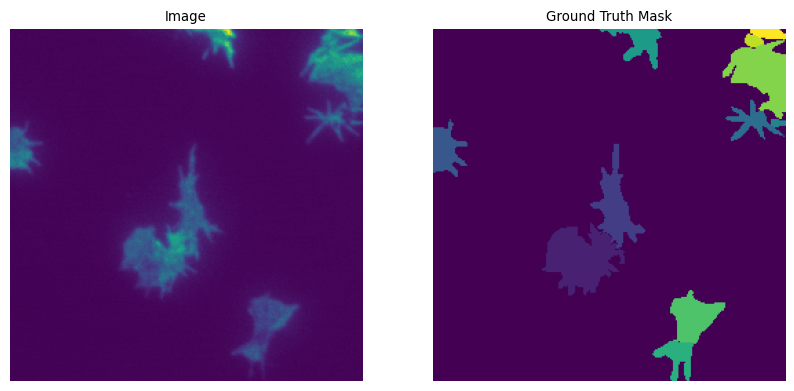

In [ ]:
index_to_show = 300

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

image = tifffile.imread("/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/combined_Images.tif")
ax[0].imshow(image[index_to_show])
ax[0].axis("off")
ax[0].set_title("Image")

ground = tifffile.imread("/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/combined_Masks.tif")
ax[1].imshow(ground[index_to_show])
ax[1].axis("off")
ax[1].set_title("Ground Truth Mask")

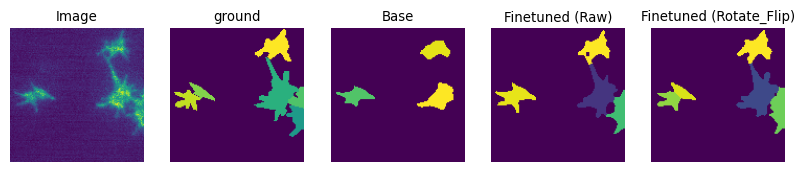

In [93]:
index_to_show = 200

# Update font size if to many models
# plt.rcParams.update({'font.size': 8})

fig, ax = plt.subplots(1, len(model_label_paths_list)+2, figsize=(10, 10))

image = tifffile.imread(image_path)
ax[0].imshow(image[index_to_show])
ax[0].axis("off")
ax[0].set_title("Image")


ground = tifffile.imread(ground_label_paths[0])
ax[1].imshow(ground[index_to_show])
ax[1].axis("off")
ax[1].set_title("ground")

for i in range(len(model_label_paths_list)):
    segmentation = tifffile.imread(model_label_paths_list[i][0])

    ax[i+2].imshow(segmentation[index_to_show])
    ax[i+2].axis("off")
    ax[i+2].set_title(model_names[i])

In [94]:
def IoU_score(ground, segmentation):
    intersection_array = np.where((ground > 0) & (segmentation > 0) & (ground != 0), 1, 0)
    union_array = np.where((ground != 0) | (segmentation != 0), 1, 0)

    intersection_sum = intersection_array.sum()
    union_sum = union_array.sum()

    score = intersection_sum/union_sum

    return score

In [103]:
import matplotlib.patches as mpatches
import matplotlib.colors as colors

def IoU_plot(ground, segmentation):
    intersection_array = np.where((ground > 0) & (segmentation > 0) & (ground != 0), 1, 0)
    union_array = np.where((ground != 0) | (segmentation != 0), 1, 0)
    
    print(intersection_array.shape)
    print(union_array.shape)

    graph_array = np.zeros(union_array.shape)
    graph_array = np.where((ground == 0) & (segmentation != 0), 1, graph_array)
    graph_array = np.where((ground != 0) & (segmentation == 0), 2, graph_array)
    graph_array = np.where(intersection_array == 1, 3, graph_array)

    cmap_building = ["black"]
    legend_patches = [mpatches.Patch(color='black', label='Empty')]

    
    if 1 in np.unique(graph_array):
        cmap_building.append("red")
        legend_patches.append(mpatches.Patch(color='red', label='Auto-segmented (Incorrect)'))

    if 2 in np.unique(graph_array):
        cmap_building.append("orange")
        legend_patches.append(mpatches.Patch(color='orange', label='Ground Truth'))

    if 3 in np.unique(graph_array):
        cmap_building.append("blue")
        legend_patches.append(mpatches.Patch(color='blue', label='Union'))

    print(cmap_building)
    print(legend_patches)

    cmap = colors.ListedColormap(cmap_building)   

    score = IoU_score(ground=ground, segmentation=segmentation)

    plot = plt.imshow(graph_array, cmap=cmap)
    plt.legend(handles=legend_patches, title='Values', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.axis("off")
    plt.title(f"IoU Score: {round(score, 5)}")
    return plot

In [119]:
import matplotlib.patches as mpatches
import matplotlib.colors as colors

def IoU_plot_ax(ground, segmentation, ax):
    intersection_array = np.where((ground > 0) & (segmentation > 0) & (ground != 0), 1, 0)
    union_array = np.where((ground != 0) | (segmentation != 0), 1, 0)
    
    print(intersection_array.shape)
    print(union_array.shape)

    graph_array = np.zeros(union_array.shape)
    graph_array = np.where((ground == 0) & (segmentation != 0), 1, graph_array)
    graph_array = np.where((ground != 0) & (segmentation == 0), 2, graph_array)
    graph_array = np.where(intersection_array == 1, 3, graph_array)

    cmap_building = ["black"]
    legend_patches = [mpatches.Patch(color='black', label='Empty')]

    
    if 1 in np.unique(graph_array):
        cmap_building.append("red")
        legend_patches.append(mpatches.Patch(color='red', label='Auto-segmented (Incorrect)'))

    if 2 in np.unique(graph_array):
        cmap_building.append("orange")
        legend_patches.append(mpatches.Patch(color='orange', label='Ground Truth'))

    if 3 in np.unique(graph_array):
        cmap_building.append("blue")
        legend_patches.append(mpatches.Patch(color='blue', label='Union'))

    print(cmap_building)
    print(legend_patches)

    cmap = colors.ListedColormap(cmap_building)
    bounds = [0, 1, 2, 3, 4]
    norm = colors.BoundaryNorm(bounds, len(cmap_building))

    score = IoU_score(ground=ground, segmentation=segmentation)

    im = ax.imshow(graph_array, cmap=cmap, norm=norm)
    ax.set_title(f"IoU Score: {round(score, 5)}")
    ax.axis("off")

    score = IoU_score(ground=ground, segmentation=segmentation)

    im = ax.imshow(graph_array, cmap=cmap, norm=norm)
    ax.set_title(f"IoU Score: {round(score, 4)}")
    ax.axis("off")

    # Add legend only once if needed externally
    return im, legend_patches, score

In [96]:
def plot_IoU_over_time(ground, segmentation):
    scores = []
    for i in range(len(ground)):
        scores.append(IoU_score(ground[i], segmentation[i]))
    # plt.imshow(segmentation[-1])
    # plt.show()


    plt.title("IoU over time")
    plt.xlabel("frame")
    plt.ylabel("IoU score")
    plt.ylim(0, 1)
    plt.plot(scores)
    

In [154]:
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import matplotlib.animation as animation

def compute_graph_array(ground, segmentation):
    intersection_array = np.where((ground > 0) & (segmentation > 0) & (ground != 0), 1, 0)
    union_array = np.where((ground != 0) | (segmentation != 0), 1, 0)
    
    graph_array = np.zeros(union_array.shape)
    graph_array = np.where((ground == 0) & (segmentation != 0), 1, graph_array)
    graph_array = np.where((ground != 0) & (segmentation == 0), 2, graph_array)
    graph_array = np.where(intersection_array == 1, 3, graph_array)

    return graph_array

def animate_IoU_plot(ground_stack, segmentation_stack, interval=500):
    ground_seg_pairs = list(zip(ground_stack, segmentation_stack))
    fig, ax = plt.subplots()

    def update(frame):
        ground, segmentation = ground_seg_pairs[frame]
        score = IoU_score(ground=ground, segmentation=segmentation)
        graph_array = compute_graph_array(ground, segmentation)

        cmap_building = ["black"]
        legend_patches = [mpatches.Patch(color='black', label='Empty')]
        
        if 1 in np.unique(graph_array):
            cmap_building.append("red")
            legend_patches.append(mpatches.Patch(color='red', label='Auto-segmented (Incorrect)'))

        if 2 in np.unique(graph_array):
            cmap_building.append("orange")
            legend_patches.append(mpatches.Patch(color='orange', label='Ground Truth'))

        if 3 in np.unique(graph_array):
            cmap_building.append("blue")
            legend_patches.append(mpatches.Patch(color='blue', label='Union'))

        cmap = colors.ListedColormap(cmap_building)   

        ax.legend(handles=legend_patches, title='Values', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.axis("off")
        ax.set_title("IoU Over Time")

        im = ax.imshow(graph_array, cmap=cmap)
        ax.set_title(f"IoU Frame {frame+1}, Score = {round(score, 5)}")
        return [im]

    anim = animation.FuncAnimation(fig, update, frames=len(ground_seg_pairs), interval=interval, blit=True)
    plt.show()
    return anim

In [98]:
def cellByCell_IoU(ground, segmentation):
    for i in range(ground.shape[0]):
        ground_img = ground[i]
        segmentation_img = segmentation[i]

        for id in np.unique(ground_img):
            if (id == 0):
                continue

            overlap = np.where(ground_img == id, segmentation_img, 0)
            overlapping_ids = list(np.unique(overlap))

            ground_img_filtered = np.where(ground_img == id, 1, 0)

            segmentation_img_filtered = segmentation_img
            
            for overlapping_id in overlapping_ids:
                if (overlapping_id == 0):
                    segmentation_img_filtered = np.where(True, 0, 0)
                else:
                    segmentation_img_filtered = np.where(segmentation_img == overlapping_id, segmentation_img, segmentation_img_filtered)
            
            score = IoU_score(ground=ground_img_filtered, segmentation=segmentation_img_filtered)
            # print("Frame: " i )

            if (i == 100):
                plot = IoU_plot(ground_img_filtered, segmentation_img_filtered)
                plt.legend("off")
                plt.show()
    


(128, 128)
(128, 128)
['black', 'red', 'orange', 'blue']
[<matplotlib.patches.Patch object at 0x13adc3b50>, <matplotlib.patches.Patch object at 0x13d90fe80>, <matplotlib.patches.Patch object at 0x13d90fd90>, <matplotlib.patches.Patch object at 0x13d90fa90>]
(128, 128)
(128, 128)
['black', 'red', 'orange', 'blue']
[<matplotlib.patches.Patch object at 0x13c22d1e0>, <matplotlib.patches.Patch object at 0x13d93e830>, <matplotlib.patches.Patch object at 0x13d8ef850>, <matplotlib.patches.Patch object at 0x13d8ed840>]
(128, 128)
(128, 128)
['black', 'red', 'orange', 'blue']
[<matplotlib.patches.Patch object at 0x13d99bb80>, <matplotlib.patches.Patch object at 0x13d96dff0>, <matplotlib.patches.Patch object at 0x13d96e4d0>, <matplotlib.patches.Patch object at 0x13d96dd20>]


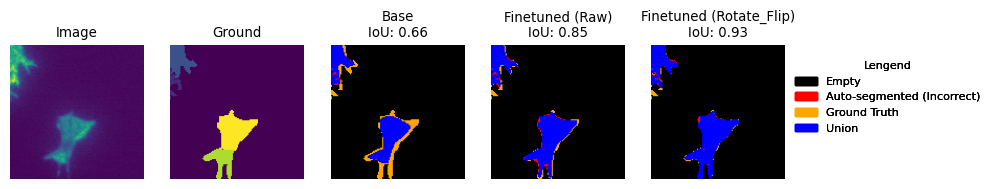

In [158]:
index_to_show = 298

# Update font size if to many models
plt.rcParams.update({'font.size': 8})

fig, ax = plt.subplots(1, len(model_label_paths_list)+2, figsize=(10, 10))

image = tifffile.imread(image_path)
ax[0].imshow(image[index_to_show])
ax[0].axis("off")
ax[0].set_title("Image")


ground = tifffile.imread(ground_label_paths[0])
ax[1].imshow(ground[index_to_show])
ax[1].axis("off")
ax[1].set_title("Ground")


for i in range(len(model_label_paths_list)):
    segmentation = tifffile.imread(model_label_paths_list[i][0])

    im, legend_patches, score = IoU_plot_ax(ground[index_to_show], segmentation[index_to_show], ax[i+2])
    ax[i+2].set_title(model_names[i] + f"\nIoU: {round(score, 2)}")
    fig.legend(
    handles=legend_patches,
    title="Lengend",
    loc="center left",
    bbox_to_anchor=(0.9, 0.51),
    frameon=False)


(303, 128, 128)
segmentation_SAM


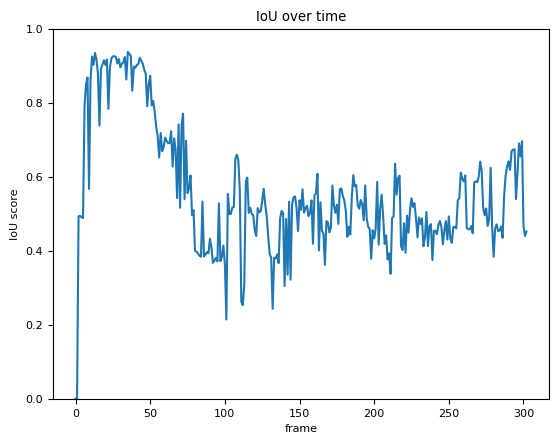

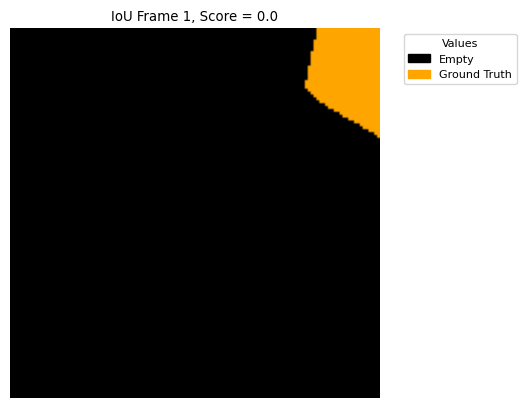

In [155]:
ground = tifffile.imread(ground_label_paths[0])

segmentation_SAM = tifffile.imread(model_label_paths_list[0][0])
print(ground.shape)

print("segmentation_SAM")
plot_IoU_over_time(ground=ground, segmentation=segmentation_SAM)
plt.show()

anim = animate_IoU_plot(ground_stack=ground, segmentation_stack=segmentation_SAM)
anim.save(f"iou_animation.gif", writer="pillow", fps=5)


In [150]:
model_label_paths_list

[['/Users/jakesolsky/PlateletImageSegmentation/Data/Validation/Base/Base_auto_segmentation.tif'],
 ['/Users/jakesolsky/PlateletImageSegmentation/Data/Validation/Finetuned_Raw/Finetuned_Raw_auto_segmentation.tif'],
 ['/Users/jakesolsky/PlateletImageSegmentation/Data/Validation/Finetuned_Rotate_Flip/Finetuned_Rotate_Flip_auto_segmentation.tif']]

## Average Precicion (using stardist)

In [90]:
# Create an empty DataFrame with those index values
df_list = []

for j, model_path in enumerate(model_label_paths_list):
    df_model = pd.DataFrame(index=index_values)
    df_model["tp"] = 0
    df_model["fn"] = 0
    df_model["fp"] = 0
    
    df_list.append(df_model)

# Only test on stack images, can isolate for experiments using indexing
ground_stack = tifffile.imread(ground_label_paths)
ground_stack = ground_stack.astype(int)

for j, model_path in enumerate(model_label_paths_list):
    segmentation_stack = tifffile.imread(model_label_paths_list[j])
    segmentation_stack = segmentation_stack.astype(int)
    
    for i in range(len(segmentation_stack)):
        df_list[j]["metrics"] = df_list[j].apply(lambda x: matching(ground_stack[i], segmentation_stack[i], thresh=float(x.name)), axis=1)
        df_list[j]["tp"] = df_list[j].apply(lambda x: x["tp"] + x["metrics"].tp, axis=1)
        df_list[j]["fn"] = df_list[j].apply(lambda x: x["fn"] + x["metrics"].fn, axis=1)
        df_list[j]["fp"] = df_list[j].apply(lambda x: x["fp"] + x["metrics"].fp, axis=1)

    df_list[j]["Precision"] = df_list[j]["tp"]/(df_list[j]["tp"]+df_list[j]["fn"]+df_list[j]["fp"])

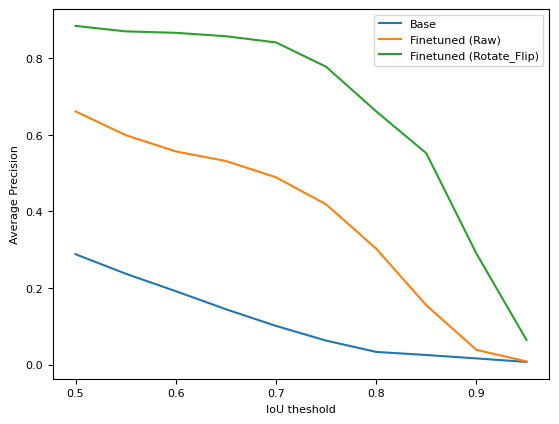

In [91]:
# plt.plot(df_sam_finetuned["Precision"])
# plt.plot(df_sam["Precision"])

for i, df in enumerate(df_list):
    plt.plot(df["Precision"])

plt.ylabel("Average Precision")
plt.xlabel("IoU theshold")
plt.legend(labels = model_names)
plt.show()

Text(0.5, 1.0, '')

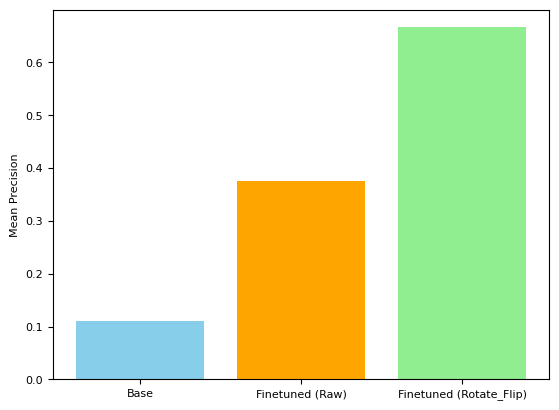

In [92]:
mean_precision = []

for df in df_list:
    mean_precision.append(df["Precision"].mean())

plt.bar(model_names, mean_precision, color=['skyblue', 'orange', 'lightgreen'])
plt.ylabel("Mean Precision")
plt.title("")

## Model Training Time

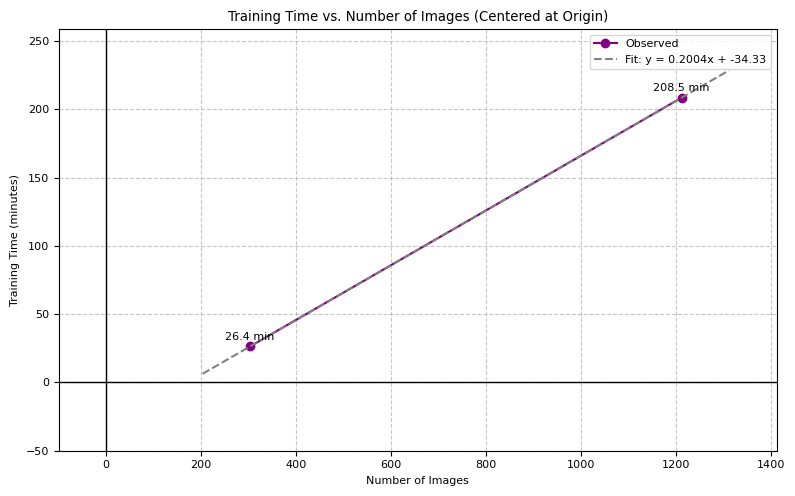

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Data
image_counts = [303, 1212]
times_minutes = [26.38, 208.5]

# Linear fit
x = np.array(image_counts)
y = np.array(times_minutes)
slope, intercept = np.polyfit(x, y, 1)

# Regression line
x_line = np.linspace(min(x) - 100, max(x) + 100, 100)
y_line = slope * x_line + intercept

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='-', color='purple', label='Observed')
plt.plot(x_line, y_line, linestyle='--', color='gray', label=f'Fit: y = {slope:.4f}x + {intercept:.2f}')

# Annotate data points
for x_val, y_val in zip(image_counts, times_minutes):
    plt.text(x_val, y_val + 5, f'{y_val:.1f} min', ha='center')

# Axes formatting
plt.axhline(0, color='black', linewidth=1)  # x-axis
plt.axvline(0, color='black', linewidth=1)  # y-axis
plt.xlim(-100, max(x) + 200)
plt.ylim(-50, max(y) + 50)

plt.title('Training Time vs. Number of Images (Centered at Origin)')
plt.xlabel('Number of Images')
plt.ylabel('Training Time (minutes)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
